# Lab 4
### Contrast Enhancement

http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist



In [1]:
from commonfunctions import *
from skimage.color import rgb2gray,rgb2hsv,rgba2rgb
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

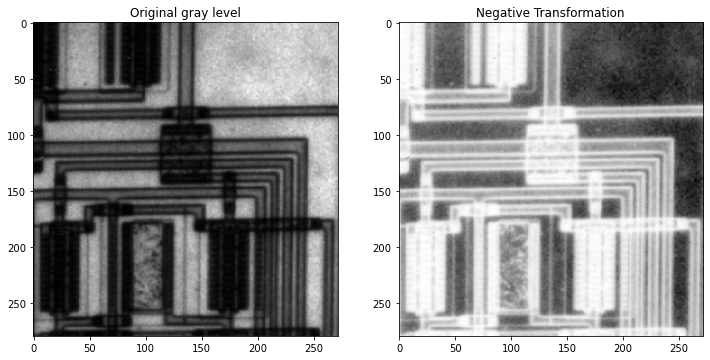

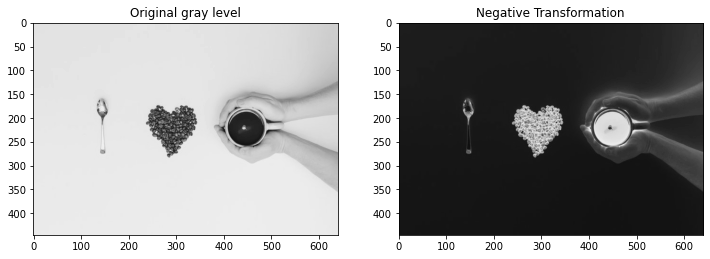

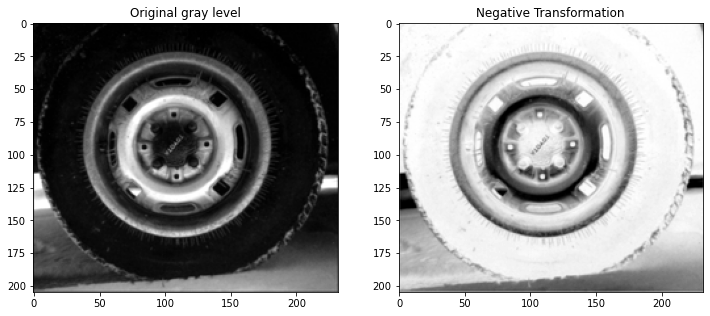

In [3]:
'''
1
Negative Transformation
'''
   
def NegativeTransformation(original):
    if(len(original.shape)==2):
        image=original
    elif(original.shape[2]==4):
        image=original=rgb2gray(rgba2rgb(original))
    elif(original.shape[2]==3):
        image=original=rgb2gray(original)
  
    if(image.max()<=1):
        image*=255
        
    image=255-image
    show_images(images=[original,image],titles=["Original gray level","Negative Transformation"])


    
image1=(io.imread("imgs/circuit.tif"))
image2=(io.imread("imgs/coffee.jpeg"))
image3=(io.imread("imgs/tire.tif"))
NegativeTransformation(original=image1)
NegativeTransformation(original=image2)
NegativeTransformation(original=image3)

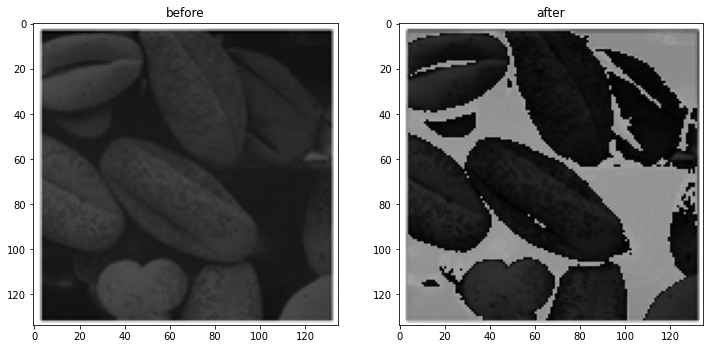

C:\Users\Eslam Ashraf\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


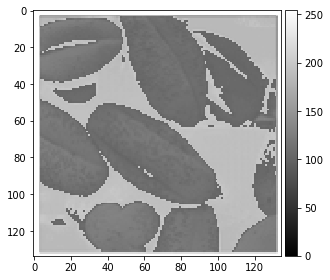

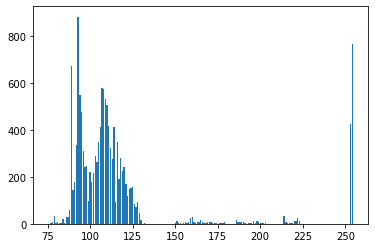

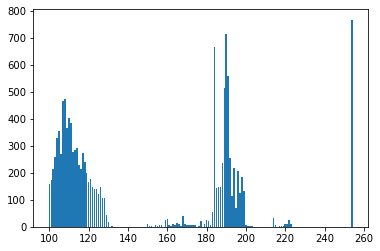

In [4]:
'''
2
Contrast Enhancement
'''

def Contrast_enhancement(image):
    if(len(image.shape)==2):
        image=image
    elif(image.shape[2]==4):
        image=rgb2gray(rgba2rgb(image))
        image=image*255
    elif(image.shape[2]==3):
        image=rgb2gray(image)
        image=image*255
   
    data_final = []
    data_final = np.zeros((image.shape[0],image.shape[1]))
    data_final = np.where(((image>=0) & (image<=100)),1.5*image+50,image)
   
    show_images([image,data_final],["before","after"])
    io.imshow(data_final, cmap="gray",vmin=0,vmax=255)
    io.show()
    showHist(image)
    showHist(data_final)
    
img = io.imread('./imgs/Picture2.png')
Contrast_enhancement(image=img)


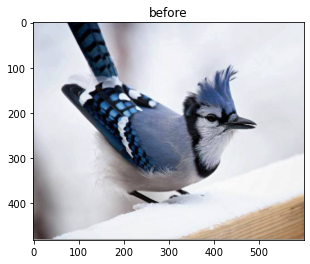

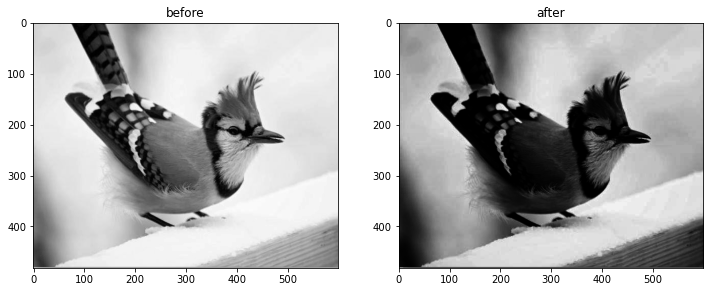

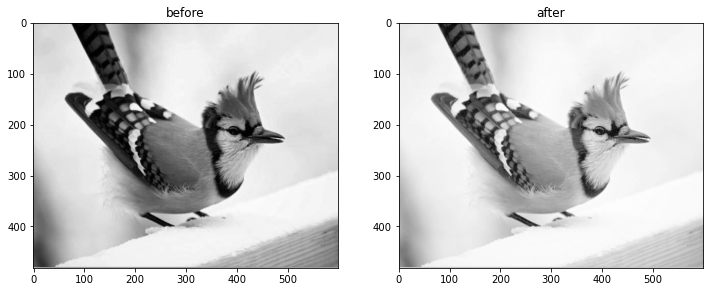

In [5]:
'''
3
Gamma Correction
'''
img = io.imread('./imgs/bird.jpg')
show_images([img],["before"])

def Gamma_Correction(image, const, gamma):
    if(len(image)==2 and image.max()>1):
        image=image/255
    elif(len(image)==2):
         image=image
    elif(image.shape[2]==4):
        image=rgb2gray(rgba2rgb(image))
    elif(image.shape[2]==3):
        image=rgb2gray(image)
    data_final = []
    data_final = np.zeros((image.shape[0],image.shape[1]))
    data_final=image
    data_final = const*np.power(data_final, gamma)
    show_images([image,data_final],["before","after"])
Gamma_Correction(image=img,const=1,gamma=3)
Gamma_Correction(image=img,const=1,gamma=0.5)


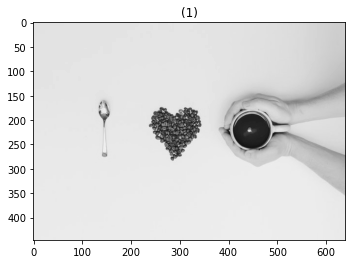

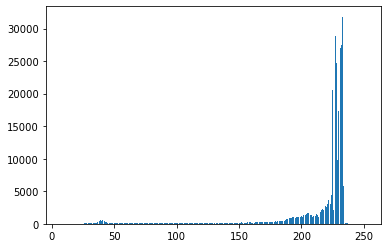

In [6]:
'''
4 Histogram Eq.
Note: Histogram function of skimage returns only present intensity values not all 255
You can use showHist function from commonfunctions file
'''

def getImageWithHist(name,ext,nbins=256):
    img=io.imread("imgs/"+name+'.'+ext)
    if(ext=='tif'):
        img=img
    elif(ext=='png'):
        img=rgb2gray(rgba2rgb(img))
        img=img*255
    else:
        img=rgb2gray(img)
        img=img*255
    show_images([img])
    showHist(img)
  
    
getImageWithHist(name="coffee",ext="jpeg")

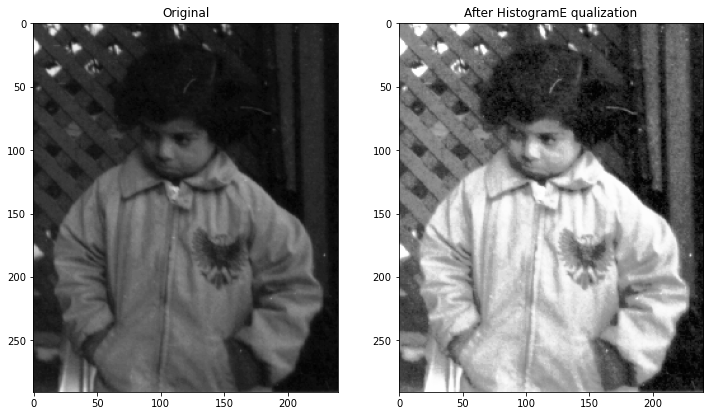

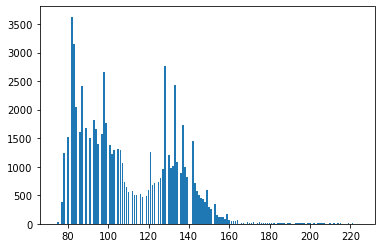

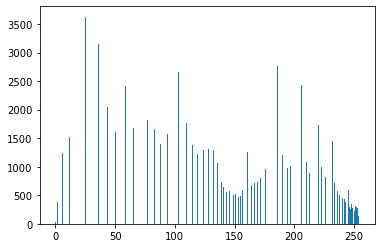

In [26]:
def HistogramEqualization(img):
    if(len(img.shape)==2):
        img=img
    elif(img.shape[2]==4):
        img=rgb2gray(rgba2rgb(img))
        img=img*255
    elif(img.shape[2]==3):
        img=rgb2gray(img)
        img=img*255
    
    width,height=img.shape
    # Flattning the image and converting it into a histogram
    histOrig, bins = np.histogram(img, 256, [0, 255])
   
    cdf = histOrig.cumsum()  # Calculating the cumsum of pixels of the histogram
    
    cdf = np.round(cdf * 255 / (height *width))  # Histogram Equalization
    imgEq=cdf[img.astype('uint8')]

    return imgEq

image1=(io.imread("imgs/pout.tif"))
imgEq=HistogramEqualization(img=image1)
show_images([image1,imgEq],['Original','After HistogramE qualization'])
showHist(image1)
showHist(imgEq)

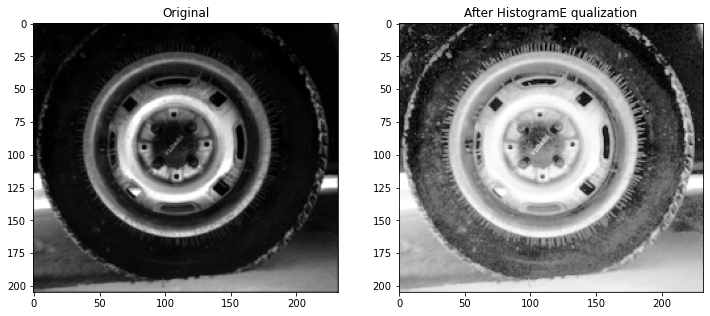

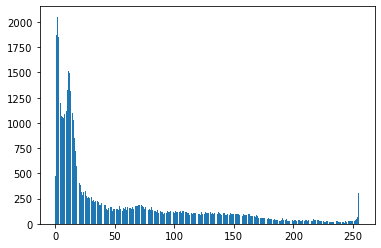

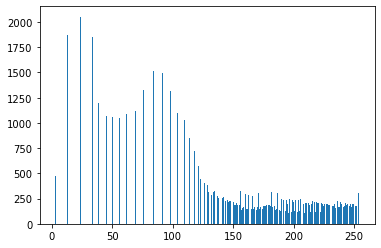

In [8]:
image1=(io.imread("imgs/tire.tif"))
imgEq=HistogramEqualization(img=image1)
show_images([image1,imgEq],['Original','After HistogramE qualization'])
showHist(image1)
showHist(imgEq)

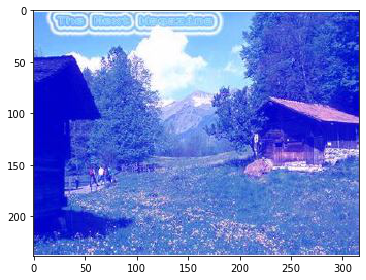

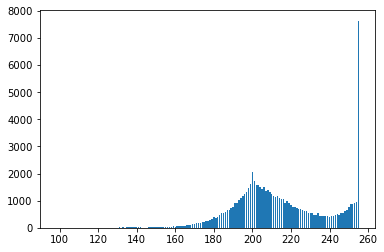

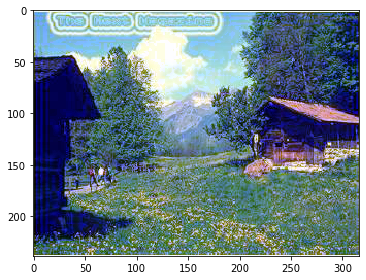

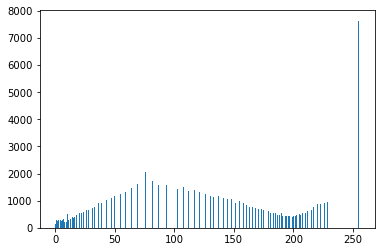

In [24]:
image=(io.imread("2.jpg"))
io.imshow(image)
io.show()
showHist(image[:,:,2])
io.show()
image[:,:,2]=HistogramEqualization(image[:,:,2])
        
io.imshow(image)
io.show()
showHist(image[:,:,2])

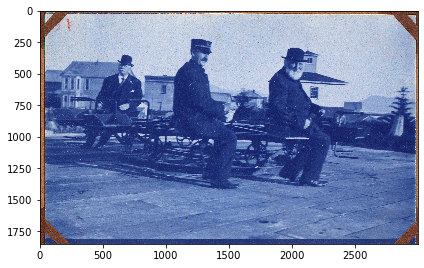

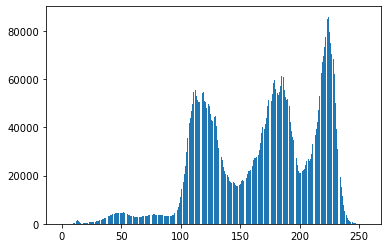

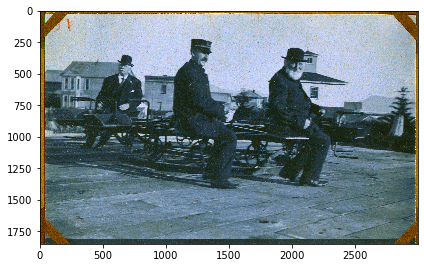

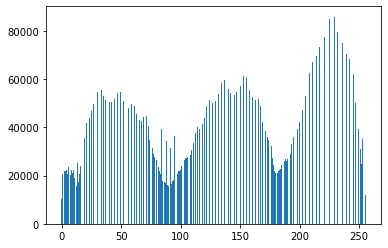

In [23]:
image=(io.imread("1.jpg"))
io.imshow(image)
io.show()
showHist(image[:,:,2])
io.show()
image[:,:,2]=HistogramEqualization(image[:,:,2])
        
io.imshow(image)
io.show()
showHist(image[:,:,2])